In [ ]:
import numpy as np # used for handling numbers 
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
#from sklearn.preprocessing import StandardScaler # used for feature scaling

Load Dataset

In [ ]:
dataset = pd.read_csv('datamahasiswa_proses_2.csv', delimiter=";") # to import the dataset into a variable

In [ ]:
dataset

,Alamat,PedidikanIbu,PendidikanBapak,PekerjaanIbu,PekerjaanBapak,Bekerja,LamaKuliah,SKSSemester,Keuangan,JumlahSKS,DataAbsen,NilaiTesMasuk,NilaiIPS,NilaiIPK,StatusDropout
0,1,3,2,2,2,1,2,20,3,93,5,80,3.18,3.11,0
1,0,3,3,1,2,0,2,20,1,95,6,85,3.26,3.18,0
2,0,4,4,2,1,0,2,20,3,93,8,85,3.18,3.11,0
3,0,4,1,2,1,0,2,20,1,95,0,85,3.26,3.19,0
4,0,3,4,1,3,0,2,20,1,80,8,80,3.10,3.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0,1,1,1,1,0,3,20,2,108,2,85,4.00,3.83,2
936,0,2,1,4,1,0,3,20,2,108,0,80,4.00,3.83,2
937,0,2,4,1,2,0,3,20,2,108,0,85,4.00,3.85,2
938,0,2,1,1,2,0,3,20,2,108,0,80,4.00,3.85,2


In [ ]:
# Splitting the attributes into independent and dependent attributes
dataset = dataset.to_numpy() # ubah pd.Daraframe menjadi array numpy
X = dataset[:, 0:14] # Which contains the features
y = dataset[:, 14] # Which contains the target variable

Missing Value (Mean)

In [ ]:
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(X[:, 0:])
X[:, 0:] = imputer.transform(X[:, 0:])

In [ ]:
X

array([[ 1.  ,  3.  ,  2.  , ..., 80.  ,  3.18,  3.11],
       [ 0.  ,  3.  ,  3.  , ..., 85.  ,  3.26,  3.18],
       [ 0.  ,  4.  ,  4.  , ..., 85.  ,  3.18,  3.11],
       ...,
       [ 0.  ,  2.  ,  4.  , ..., 85.  ,  4.  ,  3.85],
       [ 0.  ,  2.  ,  1.  , ..., 80.  ,  4.  ,  3.85],
       [ 0.  ,  4.  ,  4.  , ..., 85.  ,  4.  ,  3.84]])

In [ ]:
X = pd.DataFrame(data=X,  columns= ['Alamat','PendidikanIbu','PendidikanBapak','PekerjaanIbu','PekerjaanBapak',
                 'Bekerja','LamaKuliah','SKSSemester','Keuangan','JumlahSKS',
                 'DataAbsen','NilaiTesMasuk','NilaiIPS','NilaiIPK'])

In [ ]:
X

,Alamat,PendidikanIbu,PendidikanBapak,PekerjaanIbu,PekerjaanBapak,Bekerja,LamaKuliah,SKSSemester,Keuangan,JumlahSKS,DataAbsen,NilaiTesMasuk,NilaiIPS,NilaiIPK
0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,20.0,3.0,93.0,5.0,80.0,3.18,3.11
1,0.0,3.0,3.0,1.0,2.0,0.0,2.0,20.0,1.0,95.0,6.0,85.0,3.26,3.18
2,0.0,4.0,4.0,2.0,1.0,0.0,2.0,20.0,3.0,93.0,8.0,85.0,3.18,3.11
3,0.0,4.0,1.0,2.0,1.0,0.0,2.0,20.0,1.0,95.0,0.0,85.0,3.26,3.19
4,0.0,3.0,4.0,1.0,3.0,0.0,2.0,20.0,1.0,80.0,8.0,80.0,3.10,3.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.0,1.0,1.0,1.0,1.0,0.0,3.0,20.0,2.0,108.0,2.0,85.0,4.00,3.83
936,0.0,2.0,1.0,4.0,1.0,0.0,3.0,20.0,2.0,108.0,0.0,80.0,4.00,3.83
937,0.0,2.0,4.0,1.0,2.0,0.0,3.0,20.0,2.0,108.0,0.0,85.0,4.00,3.85
938,0.0,2.0,1.0,1.0,2.0,0.0,3.0,20.0,2.0,108.0,0.0,80.0,4.00,3.85


Min-Max Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[1.         0.75       0.5        ... 0.25       0.795      0.58064516]
 [0.         0.75       0.75       ... 0.5        0.815      0.61827957]
 [0.         1.         1.         ... 0.5        0.795      0.58064516]
 ...
 [0.         0.5        1.         ... 0.5        1.         0.97849462]
 [0.         0.5        0.25       ... 0.25       1.         0.97849462]
 [0.         1.         1.         ... 0.5        1.         0.97311828]]


In [ ]:
X = pd.DataFrame(data=X, columns= ['Alamat','PendidikanIbu','PendidikanBapak','PekerjaanIbu','PekerjaanBapak',
                 'Bekerja','LamaKuliah','SKSSemester','Keuangan','JumlahSKS',
                 'DataAbsen','NilaiTesMasuk','NilaiIPS','NilaiIPK'])

In [ ]:
X

,Alamat,PendidikanIbu,PendidikanBapak,PekerjaanIbu,PekerjaanBapak,Bekerja,LamaKuliah,SKSSemester,Keuangan,JumlahSKS,DataAbsen,NilaiTesMasuk,NilaiIPS,NilaiIPK
0,1.0,0.75,0.50,0.333333,0.333333,1.0,0.5,0.869565,1.0,0.772727,0.625,0.25,0.795,0.580645
1,0.0,0.75,0.75,0.000000,0.333333,0.0,0.5,0.869565,0.0,0.803030,0.750,0.50,0.815,0.618280
2,0.0,1.00,1.00,0.333333,0.000000,0.0,0.5,0.869565,1.0,0.772727,1.000,0.50,0.795,0.580645
3,0.0,1.00,0.25,0.333333,0.000000,0.0,0.5,0.869565,0.0,0.803030,0.000,0.50,0.815,0.623656
4,0.0,0.75,1.00,0.000000,0.666667,0.0,0.5,0.869565,0.0,0.575758,1.000,0.25,0.775,0.553763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.0,0.25,0.25,0.000000,0.000000,0.0,1.0,0.869565,0.5,1.000000,0.250,0.50,1.000,0.967742
936,0.0,0.50,0.25,1.000000,0.000000,0.0,1.0,0.869565,0.5,1.000000,0.000,0.25,1.000,0.967742
937,0.0,0.50,1.00,0.000000,0.333333,0.0,1.0,0.869565,0.5,1.000000,0.000,0.50,1.000,0.978495
938,0.0,0.50,0.25,0.000000,0.333333,0.0,1.0,0.869565,0.5,1.000000,0.000,0.25,1.000,0.978495


Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
threshold = 8  # the number of most relevant features #Revisi : (menggunakan rangking nilai information gain )
high_score_features = []
feature_scores = mutual_info_classif(X, y, random_state=0)
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
X = X[high_score_features]
print(X)

NilaiIPS 0.9347252748669964
NilaiIPK 0.931673469242137
JumlahSKS 0.3901146666293527
Keuangan 0.33235344938115086
LamaKuliah 0.3038692563009264
SKSSemester 0.12156733507460271
NilaiTesMasuk 0.06005184160934052
PendidikanBapak 0.028895089771626692
     NilaiIPS  NilaiIPK  JumlahSKS  ...  SKSSemester  NilaiTesMasuk  PendidikanBapak
0       0.795  0.580645   0.772727  ...     0.869565           0.25             0.50
1       0.815  0.618280   0.803030  ...     0.869565           0.50             0.75
2       0.795  0.580645   0.772727  ...     0.869565           0.50             1.00
3       0.815  0.623656   0.803030  ...     0.869565           0.50             0.25
4       0.775  0.553763   0.575758  ...     0.869565           0.25             1.00
..        ...       ...        ...  ...          ...            ...              ...
935     1.000  0.967742   1.000000  ...     0.869565           0.50             0.25
936     1.000  0.967742   1.000000  ...     0.869565           0.25       

In [ ]:
X=np.array(X)
X

array([[0.795     , 0.58064516, 0.77272727, ..., 0.86956522, 0.25      ,
        0.5       ],
       [0.815     , 0.61827957, 0.8030303 , ..., 0.86956522, 0.5       ,
        0.75      ],
       [0.795     , 0.58064516, 0.77272727, ..., 0.86956522, 0.5       ,
        1.        ],
       ...,
       [1.        , 0.97849462, 1.        , ..., 0.86956522, 0.5       ,
        1.        ],
       [1.        , 0.97849462, 1.        , ..., 0.86956522, 0.25      ,
        0.25      ],
       [1.        , 0.97311828, 1.        , ..., 0.86956522, 0.5       ,
        1.        ]])

In [ ]:
y = y.reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

#y = pd.DataFrame.from_records(y)

In [ ]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

Split Data Training 80%

In [ ]:
from sklearn.model_selection import train_test_split
# train_ratio = 0.70
# validation_ratio = 0.10
# test_ratio = 0.20
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 20% of the initial data set
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train, X_val, X_test)

[[0.75       0.54301075 0.77272727 ... 0.82608696 0.5        1.        ]
 [0.86       0.67204301 1.         ... 0.95652174 0.25       0.5       ]
 [0.965      0.87096774 1.         ... 0.82608696 0.5        1.        ]
 ...
 [0.9125     0.77956989 1.         ... 0.86956522 0.5        0.75      ]
 [0.9        0.75268817 1.         ... 0.86956522 0.25       0.75      ]
 [0.925      0.79569892 1.         ... 0.86956522 0.         0.5       ]] [[0.9375     0.82795699 1.         ... 0.82608696 0.5        0.75      ]
 [0.985      0.93548387 1.         ... 1.         0.         0.5       ]
 [0.84       0.65053763 1.         ... 0.86956522 0.5        0.5       ]
 ...
 [0.8825     0.71505376 1.         ... 0.82608696 0.25       0.75      ]
 [0.95       0.84408602 1.         ... 0.82608696 0.25       0.5       ]
 [0.5525     0.46774194 0.54545455 ... 0.82608696 0.25       1.        ]] [[0.9475     0.83870968 1.         ... 0.82608696 0.5        0.75      ]
 [0.985      0.93010753 1.         ... 

In [ ]:
X_test.shape

(283, 8)

**Neural Network**

**ALTERNATIF** **SEMENTARA**

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
import tensorflow as tf

In [ ]:
nn = Sequential()
nn.add(Dense(50, input_dim=8, activation='sigmoid'))
nn.add(Dense(70, activation='sigmoid'))
nn.add(Dense(3, activation='softmax'))
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#nn.compile(loss=tf.nn.nce_loss, optimizer='adam', metrics=['accuracy'])

print(nn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 70)                3570      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 213       
Total params: 4,233
Trainable params: 4,233
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = nn.fit(X_train, y_train, epochs=300, batch_size=20, validation_data=(X_val, y_val))


Epoch 1/300
11/11 [==============================] - 1s 42ms/step - loss: 1.0304 - accuracy: 0.5770 - val_loss: 0.9802 - val_accuracy: 0.5594
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 0.9310 - accuracy: 0.6160 - val_loss: 0.9629 - val_accuracy: 0.5594
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 0.9640 - accuracy: 0.5845 - val_loss: 0.9564 - val_accuracy: 0.5594
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 0.9494 - accuracy: 0.5831 - val_loss: 0.9631 - val_accuracy: 0.5594
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 0.9075 - accuracy: 0.6213 - val_loss: 0.9644 - val_accuracy: 0.5594
Epoch 6/300
11/11 [==============================] - 0s 6ms/step - loss: 0.9530 - accuracy: 0.5890 - val_loss: 0.9653 - val_accuracy: 0.5594
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 0.9264 - accuracy: 0.6125 - val_loss: 0.9618 - val_accuracy: 0.5594
Epoch 8/300


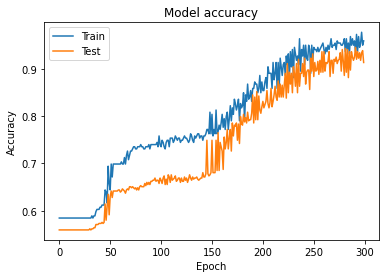

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

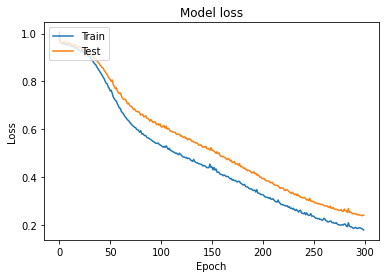

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

**Evaluate**

In [ ]:
# evaluate the model
# scores = nn.evaluate(X, y, verbose=0)
# print("%s: %.2f%%" % (nn.metrics_names[1], scores[1]*100))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**F1-Score**

In [ ]:
# predict probabilities for test set
#y_pred = nn.predict(X_val)
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(nn.predict(X_test),axis=1)

In [ ]:
print("F1-Score : %.2f" % f1_score(y_test_arg, Y_pred, average="micro"))
print("Precision : %.2f" % precision_score(y_test_arg, Y_pred, average="micro"))

F1-Score : 0.97
Precision : 0.97


In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))


Confusion Matrix
[[ 35   0   0]
 [  4  68   4]
 [  1   0 171]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       1.00      0.89      0.94        76
           2       0.98      0.99      0.99       172

    accuracy                           0.97       283
   macro avg       0.95      0.96      0.95       283
weighted avg       0.97      0.97      0.97       283



In [ ]:
#ditambah F-Score

**SIMPAN MODEL**

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(nn, 'models')

In [ ]:
# y_pred = nn.predict(X_test) #sklearn.metric f-one score / confusion  matrix 
# #w = nn.evaluate(X_test, y_test,verbose=1)
# y_pred = pd.DataFrame.from_records(y_pred)
# y_pred

In [ ]:
#data_test = pd.read_csv('datamahasiswa_campur2-angka-test2.csv', delimiter=";") # to import the dataset into a variable

In [ ]:
#data_test

In [ ]:
# data_test = data_test.to_numpy()
# X_input = data_test[:, 0:8] # Which contains the features
#y_pred = dataset[:, 8] # Which contains the target variable

In [ ]:
#X_input

In [ ]:
# X_input = pd.DataFrame(data=X_input,  columns= ['NilaiIPK','NilaiIPS','JumlahSK','Keuangan',
#                                                 'NilaiTesMasuk','SemesterBerjalan','Bekerja','DataAbsen'])

In [ ]:
# X_input

In [ ]:
# X_input = z_score(X_input)

# X_input

In [ ]:
#data_test=np.array(data_test, dtype=np.float)
# y_predt = nn.predict(np.array(X_input))
# y_predt = pd.DataFrame.from_records(y_predt)

In [ ]:
# y_predt